# K-Beauty 성장과 해외 직접 판매 경로 분석

URL: https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

필요 라이브러리 호출
- 분석에 필요한 라이브러리
- 시각화에 필요한 라이브러리
- 시각화 폰트 및 깨짐현상 방지 코드

In [1]:
# 필요 라이브러리
import pandas as pd
import numpy as np

# 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

import os

if os.name =='posix':
    sns.set(font = 'AppleGothic')
elif os.name == 'nt':
    sns.set(font = 'Malgun Gothic')

데이터 로드하기

In [90]:
df = pd.read_csv('국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20211215153843.csv', encoding = 'cp949')
print(df.shape)
df.head(2)

(450, 31)


,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4,2020 4/4
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,921586,974060,1251122,1345723,1526135,1881628,1529955,1284863,1650010,1517553
1,합계,합계,면세점,-,-,-,-,-,-,-,...,761836,770656,1070693,1157158,1336372,1655635,1297490,1051987,1410967,1247495


## 분석 시각화를 위한 TIDY DATA 작성
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [91]:
df = df.melt(id_vars = ['국가(대륙)별', '상품군별', '판매유형별'], var_name = '기간', value_name = '판매금액(백만원)')
print(df.shape)
df.head()

(12600, 5)


,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원)
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


# 데이터 전처리

1) 기간에서 연도를 분리하기

In [92]:
df['연도'] = df['기간'].str.split(" ").str[0]
df.head(5)

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


2) 기간에서 분기를 분리하기

In [93]:
df['분기'] = df['기간'].str.split(" ").str[1].str[0]
df.head(5)

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


3) 금액을 수치 데이터로 변경

In [95]:
df['판매금액(백만원)'] = pd.to_numeric(df["판매금액(백만원)"],errors = 'coerce')

In [99]:
df.dtypes

국가(대륙)별       object
상품군별          object
판매유형별         object
기간            object
판매금액(백만원)    float64
연도            object
분기            object
dtype: object

4) 국가 대륙별 합계와 상품군별 합계는 따로 구할 수 있기 때문에 제거하는 것이 필요해요

In [145]:
drop_ = df[(df['국가(대륙)별'] == "합계") | (df['상품군별'] == "합계")].index

In [146]:
df = df.drop(drop_, axis = 0)

In [148]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1


# K-Beauty 시각화

Q1. 판매유형별 == '계' 데이터를 추출해보자.(df_total로 변수 저장)

In [149]:
df_total = df[df['판매유형별'] == "계"]

Q2. 연도별, 판매액(백만원)에 대한 Line Plot을 그려보자.

<AxesSubplot:xlabel='연도', ylabel='판매금액(백만원)'>

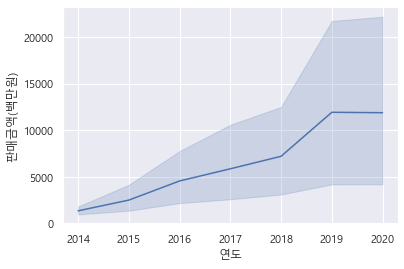

In [153]:
sns.lineplot(data = df_total, x = '연도', y = '판매금액(백만원)')

Q3. 상품군별 연도별, 판매액에 대한 Line Plot을 그려보자.

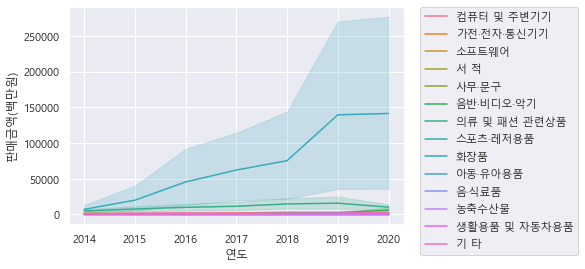

In [173]:
sns.lineplot(data = df_total, x = '연도', y = '판매금액(백만원)', hue = '상품군별')
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0.)
plt.show()

# 화장품의 온라인 쇼핑 직접 판매액

Q4. df_total 변수에서 상품군별 == '화장품' 데이터를 df_cosmetic 변수에 저장해보자.

In [175]:
df_cosmetic = df_total[df_total['상품군별'] == "화장품"]
df_cosmetic.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
72,미국,화장품,계,2014 1/4,3740.0,2014,1
117,중국,화장품,계,2014 1/4,32235.0,2014,1
162,일본,화장품,계,2014 1/4,1034.0,2014,1
207,아세안(ASEAN),화장품,계,2014 1/4,398.0,2014,1
252,유럽연합(EU),화장품,계,2014 1/4,937.0,2014,1


Q5. df_cosmetic의 연도별 판매액을 Line plot으로 표현해보자.(hue = 분기)

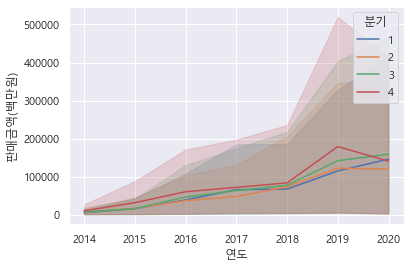

In [177]:
sns.lineplot(data = df_cosmetic, x = '연도', y = '판매금액(백만원)', hue = '분기')
plt.show()

Q6. 화장품 판매액에 대한 기간별 금액 데이터 시각화

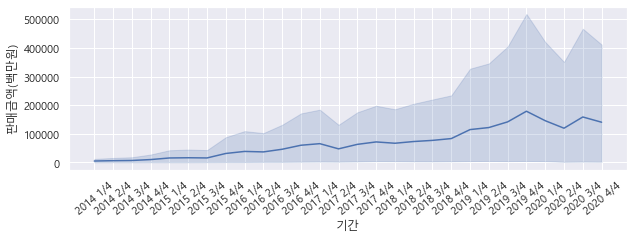

In [215]:
plt.figure(figsize = (10,3))
sns.lineplot(data = df_cosmetic, x = '기간', y = '판매금액(백만원)')
plt.xticks(rotation = 40)
plt.show()

Q7. 국가 대륙별로 다른 색상으로 표현해보기.

In [182]:
df.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '기간', '판매금액(백만원)', '연도', '분기'], dtype='object')

In [ ]:
plt.figure(figsize = (10,4))
sns.lineplot(data = df_cosmetic, x = '기간', y = '판매금액(백만원)', hue = '국가(대륙)별')
plt.show()

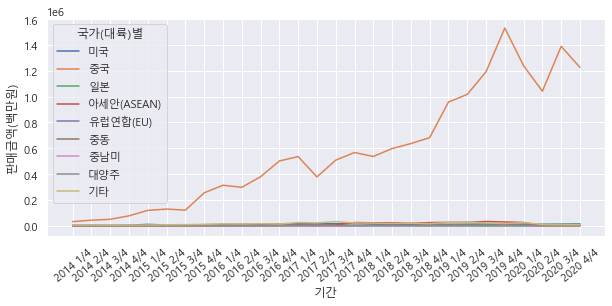

In [216]:
plt.figure(figsize = (10,4))
sns.lineplot(data = df_cosmetic, x = '기간', y = '판매금액(백만원)', hue = '국가(대륙)별')
plt.xticks(rotation = 40)
plt.show()

Q8. 중국을 제외하고 국가별로 다른 색상으로 표현하기.

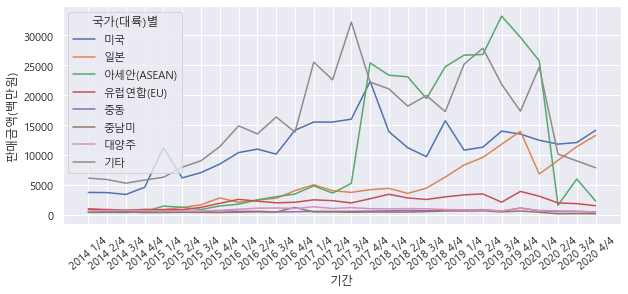

In [217]:
plt.figure(figsize = (10,4))
sns.lineplot(data = df_cosmetic[df_cosmetic['국가(대륙)별'] != '중국'], x = '기간', y = '판매금액(백만원)', hue = '국가(대륙)별')
plt.xticks(rotation = 40)
plt.show()

Q9. 판매유형별 화장품 판매액에 대한 기간별 금액 데이터를 시각화하기(Line plot)

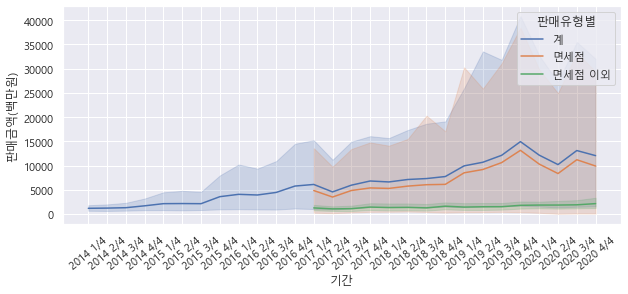

In [218]:
plt.figure(figsize = (10,4))
sns.lineplot(data = df, x = '기간', y = '판매금액(백만원)', hue = '판매유형별')
plt.xticks(rotation = 40)
plt.show()

Q10. 면세점 이외의 데이터들도 증가 했는지 확인해보기

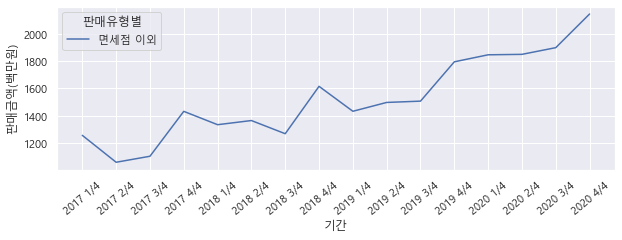

In [221]:
plt.figure(figsize = (10,3))
sns.lineplot(data = df[df['판매유형별'] == '면세점 이외'], x = '기간', y = '판매금액(백만원)', hue = '판매유형별', ci = None)
plt.xticks(rotation = 40)
plt.show()

# 의류 및 패션관련 상품 온라인 쇼핑 해외 직접 판매액

Q11. df_fasion 변수에 의류 관련 상품만 따로 담아주자.(조건1: 상품군별 == '의류 및 패션 관련상품', 조건2: 판매유형별 == '계')

In [234]:
df_fasion = df[(df['상품군별'] == '의류 및 패션 관련상품') & (df_fasion['판매유형별'] == "계")]
df_fasion.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014 1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014 1/4,1364.0,2014,1


Q12. 국가별 기간에 따른 금액 데이터 시각화

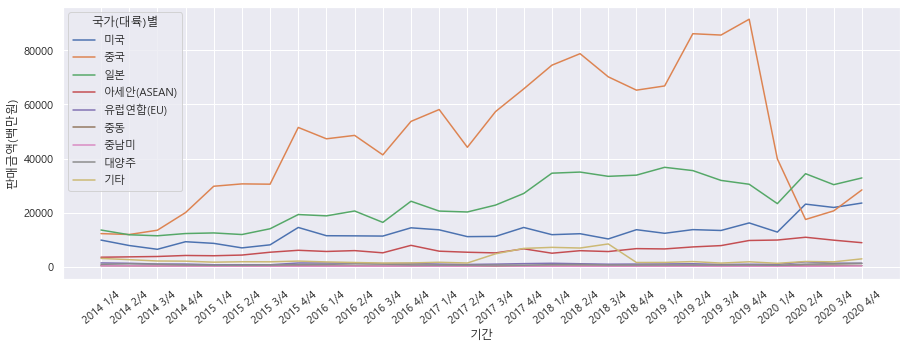

In [237]:
plt.figure(figsize = (15,5))
sns.lineplot(data = df_fasion, x = '기간', y = '판매금액(백만원)', hue = '국가(대륙)별', ci = None)
plt.xticks(rotation = 40)
plt.show()

Q13. 판매유형별 기간에 따른 금액 데이터 시각화

In [247]:
df_fasion2 = df[(df['상품군별'] == '의류 및 패션 관련상품') & (df['판매유형별'] != "계")]
df_fasion2.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
67,미국,의류 및 패션 관련상품,면세점,2014 1/4,NaN,2014,1
68,미국,의류 및 패션 관련상품,면세점 이외,2014 1/4,NaN,2014,1
112,중국,의류 및 패션 관련상품,면세점,2014 1/4,NaN,2014,1
113,중국,의류 및 패션 관련상품,면세점 이외,2014 1/4,NaN,2014,1
157,일본,의류 및 패션 관련상품,면세점,2014 1/4,NaN,2014,1


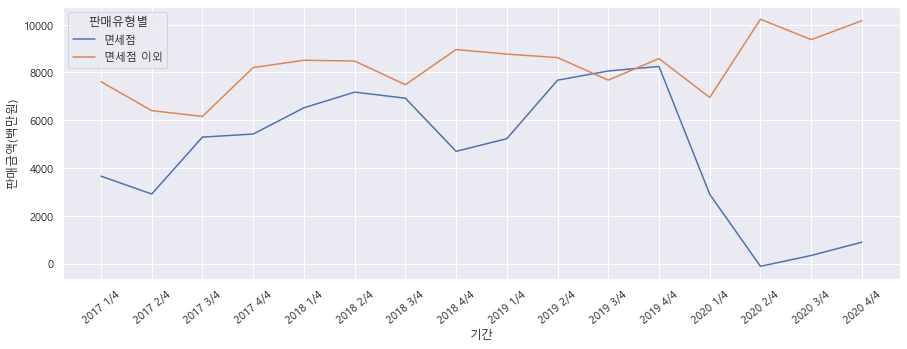

In [248]:
plt.figure(figsize = (15,5))
sns.lineplot(data = df_fasion2, x = '기간', y = '판매금액(백만원)', hue = '판매유형별', ci = None)
plt.xticks(rotation = 40)
plt.show()

Q14. 국가대륙별, 연도별 합계 금액을 Pivot_table을 통해 구하기

In [278]:
df_fasion.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014 1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014 1/4,1364.0,2014,1


In [265]:
df2 = pd.pivot_table(data = df_fasion, index = '국가(대륙)별',values = '판매금액(백만원)' , columns = '연도', aggfunc = 'sum')
df2

연도,2014,2015,2016,2017,2018,2019,2020
국가(대륙)별,,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6475.0,7734.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2489.0,3686.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55536.0,81297.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31247.0,39313.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0,5045.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134637.0,120817.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330267.0,106318.0
중남미,975.0,616.0,649.0,762.0,576.0,544.0,611.0
중동,1172.0,1018.0,968.0,772.0,879.0,951.0,1767.0


Q15. Heatmap을 통해 연도별, 국가별 합계 금액을 시각적으로 표현하기

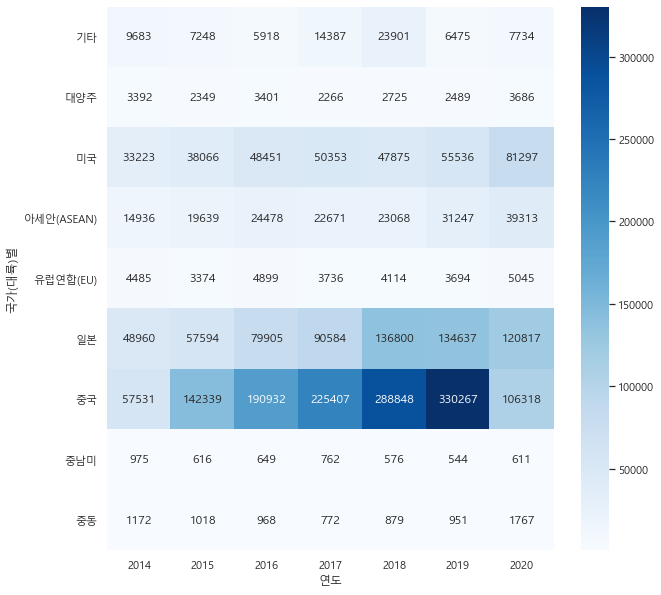

In [277]:
plt.figure(figsize = (10,10))
sns.heatmap(data = df2, cmap = 'Blues', annot = True, fmt = '.0f')
plt.show()